In [58]:
!pip install yfinance

In [59]:
import yfinance as yf
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

In [60]:
start = '2021-12-31'
end = '2022-12-31'

In [61]:
# Definimos los tickers de los assets, excluimos XLE, XLU y XLP para no registrar solucion de esquina
assets = ['XLK', 'XLV', 'XLF', 'XLY', 'XLC', 'XLI',
           'XLRE', 'XLB']
assets.sort()

In [62]:
print(assets)

['XLB', 'XLC', 'XLF', 'XLI', 'XLK', 'XLRE', 'XLV', 'XLY']


In [63]:
# Descargamos los datos
data = yf.download(assets, start = start, end = end)
data = data.loc[:,('Adj Close', slice(None))]
data.columns = assets

[*********************100%%**********************]  8 of 8 completed


In [64]:
print(data)

                  XLB        XLC        XLF         XLI         XLK  \
Date                                                                  
2021-12-31  86.730545  76.231377  37.535877  102.186424  170.698425   
2022-01-03  85.601059  76.761292  37.997269  101.346230  172.318298   
2022-01-04  86.653969  76.594467  38.996941  103.383972  170.492249   
2022-01-05  86.644402  74.671021  38.545166  102.398888  165.249649   
2022-01-06  85.553207  75.004677  39.112286  102.872108  164.415146   
...               ...        ...        ...         ...         ...   
2022-12-23  76.887894  47.357624  33.316818   96.672798  123.528702   
2022-12-27  76.956436  46.931602  33.307003   96.967567  122.358849   
2022-12-28  75.781387  46.247993  33.189243   95.700089  120.385956   
2022-12-29  76.603928  47.526051  33.650478   96.879128  123.538620   
2022-12-30  76.065361  47.545864  33.562153   96.495941  123.370079   

                 XLRE         XLV         XLY  
Date                        

In [65]:
# Calculando los retornos

Y = data.resample('M').last().pct_change().dropna()

display(Y.head())

,XLB,XLC,XLF,XLI,XLK,XLRE,XLV,XLY
Date,,,,,,,,
2022-01-31,-0.067984,-0.048018,0.000256,-0.047916,-0.068442,-0.086277,-0.068564,-0.095334
2022-02-28,-0.012670,-0.074375,-0.013825,-0.008438,-0.048774,-0.047951,-0.009678,-0.040659
2022-03-31,0.061189,0.007375,-0.001300,0.034364,0.033450,0.078251,0.057382,0.044266
2022-04-30,-0.035394,-0.141320,-0.099426,-0.076131,-0.110174,-0.035596,-0.048909,-0.119567
2022-05-31,0.011760,0.018964,0.027818,-0.004625,-0.006859,-0.051073,0.014890,-0.051203


In [66]:
!pip install riskfolio-lib

In [67]:
import riskfolio as rp

In [68]:
# Construyendo el objeto portafolio
port = rp.Portfolio(returns=Y,sht=True,uppersht=3000)

In [69]:
# Calculando el portafolio optimo

# Definiendo los parametros de seleccion del metodo de optimizacion:

method_mu='hist' # Method to estimate expected returns based on historical data.
method_cov='hist' # Method to estimate covariance matrix based on historical data.

port.assets_stats(method_mu=method_mu, method_cov=method_cov, d=0.94)

In [70]:
# Estimando el portafolio optimo:

port.alpha = 0.05
model='Classic' # Could be Classic (historical), BL (Black Litterman) or FM (Factor Model)
rm = 'MV' # Risk measure used, this time will be variance
obj = 'Sharpe' # Objective function, could be MinRisk, MaxRet, Utility or Sharpe
hist = True # Use historical scenarios for risk measures that depend on scenarios
rf = 0 # Risk free rate
l = 0 # Risk aversion factor, only useful when obj is 'Utility'

w = port.optimization(model=model, rm=rm, obj=obj, rf=rf, l=l, hist=hist)

display(w.T)

,XLB,XLC,XLF,XLI,XLK,XLRE,XLV,XLY
weights,0.005627,0.106147,0.070604,0.006224,-0.383238,0.071554,1.064447,0.057712


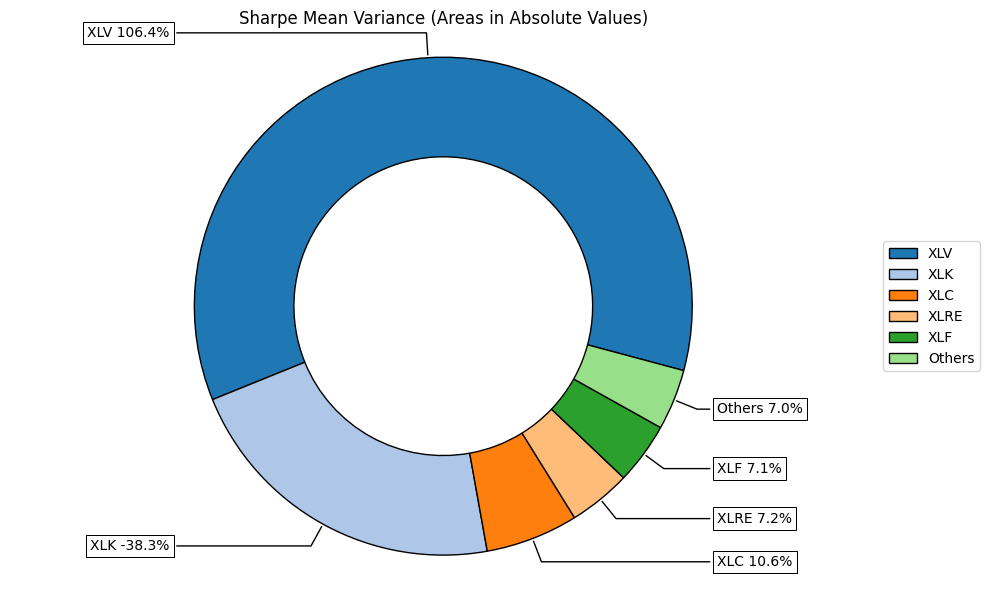

In [71]:
# Graficando la composicion del portafolio

ax = rp.plot_pie(w=w, title='Sharpe Mean Variance', others=0.05, nrow=25, cmap = "tab20",
                 height=6, width=10, ax=None)


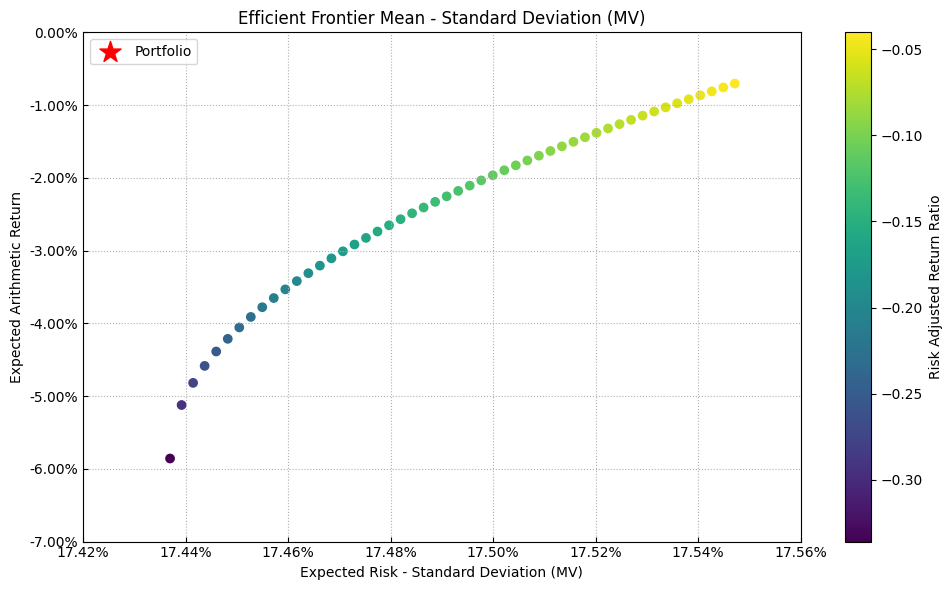

In [72]:
# Graficando la frontera eficiente
frontier=port.efficient_frontier(model=model,rm=rm,points=50,rf=rf,hist=hist)
ax=rp.plot_frontier(w_frontier=frontier,mu=port.mu,cov=port.cov,returns=Y,rm=rm,rf=rf,cmap='viridis',w=w,t_factor=12)
plt.show()

In [73]:
display(frontier.T.head())

,XLB,XLC,XLF,XLI,XLK,XLRE,XLV,XLY
0,1.769796e-10,0.119475,4.996807e-10,1.689113e-10,1.353205e-10,8.296886e-10,0.880525,2.893210e-10
1,-6.071921e-11,0.102429,1.012272e-10,-6.802401e-11,-1.165649e-10,1.595704e-10,0.897571,6.167480e-12
2,-9.238241e-11,0.095371,-8.944028e-12,-9.751821e-11,-1.303929e-10,9.021535e-12,0.904629,-4.890482e-11
3,4.968706e-11,0.089960,2.007448e-10,4.591204e-11,1.498877e-11,2.502807e-10,0.910040,8.940389e-11
4,-3.761707e-10,0.085373,-3.561645e-11,-3.970123e-10,-5.312918e-10,3.346471e-11,0.914627,-1.999362e-10


In [74]:
frontier*100

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
XLB,1.769796e-08,-6.071921e-09,-9.238241e-09,4.968706e-09,-3.761707e-08,-6.328319e-08,-4.752238e-08,-5.742195e-08,-1.271262e-08,-4.877502e-11,...,2.553072e-14,3.752667e-10,5.788538e-11,7.128216e-10,9.741665e-10,2.345481e-10,1.911572e-09,1.920553e-10,9.420557e-10,1.307119e-09
XLC,1.194751e+01,1.024287e+01,9.537142e+00,8.996019e+00,8.537308e+00,8.133913e+00,7.770870e+00,7.435971e+00,7.126192e+00,6.834020e+00,...,1.156015e+00,1.021587e+00,8.887934e-01,7.575502e-01,6.278121e-01,4.995279e-01,3.726457e-01,2.471289e-01,1.229150e-01,5.633978e-10
XLF,4.996807e-08,1.012272e-08,-8.944028e-10,2.007448e-08,-3.561645e-09,-1.082840e-08,-3.507427e-09,-5.756768e-09,1.803496e-10,1.905515e-09,...,7.402688e-11,4.211225e-09,3.047910e-10,3.280330e-09,4.716253e-09,1.202240e-09,1.104881e-08,1.414010e-09,1.027627e-08,1.706538e-09
XLI,1.689113e-08,-6.802401e-09,-9.751821e-09,4.591204e-09,-3.970123e-08,-6.662743e-08,-5.018586e-08,-6.058280e-08,-1.345658e-08,-1.096791e-10,...,-2.001225e-12,3.829723e-10,5.640845e-11,7.495026e-10,1.020946e-09,2.368748e-10,1.920152e-09,1.834982e-10,8.485373e-10,8.083124e-10
XLK,1.353205e-08,-1.165649e-08,-1.303929e-08,1.498877e-09,-5.312918e-08,-8.800747e-08,-6.771434e-08,-8.126724e-08,-1.847148e-08,-6.976747e-10,...,-7.061739e-11,-2.314519e-10,2.600180e-11,4.685431e-10,5.678927e-10,1.294799e-10,9.147933e-10,4.636358e-11,-5.700627e-10,6.508151e-10
XLRE,8.296886e-08,1.595704e-08,9.021535e-10,2.502807e-08,3.346471e-09,-6.579242e-10,4.927736e-09,3.915993e-09,2.483919e-09,2.137824e-09,...,5.567401e-11,2.657075e-09,2.015794e-10,2.019959e-09,2.925513e-09,7.479830e-10,6.773642e-09,8.638694e-10,6.254709e-09,8.305533e-10
XLV,8.805249e+01,8.975713e+01,9.046286e+01,9.100398e+01,9.146269e+01,9.186609e+01,9.222913e+01,9.256403e+01,9.287381e+01,9.316598e+01,...,9.884399e+01,9.897841e+01,9.911121e+01,9.924245e+01,9.937219e+01,9.950047e+01,9.962735e+01,9.975287e+01,9.987708e+01,1.000000e+02
XLY,2.893210e-08,6.167480e-10,-4.890482e-09,8.940389e-09,-1.999362e-08,-3.520097e-08,-2.503887e-08,-3.078006e-08,-6.402664e-09,5.167307e-10,...,1.664091e-11,7.789747e-10,7.777404e-11,8.302644e-10,1.170401e-09,2.939795e-10,2.537429e-09,2.980821e-10,1.929559e-09,5.445262e-10


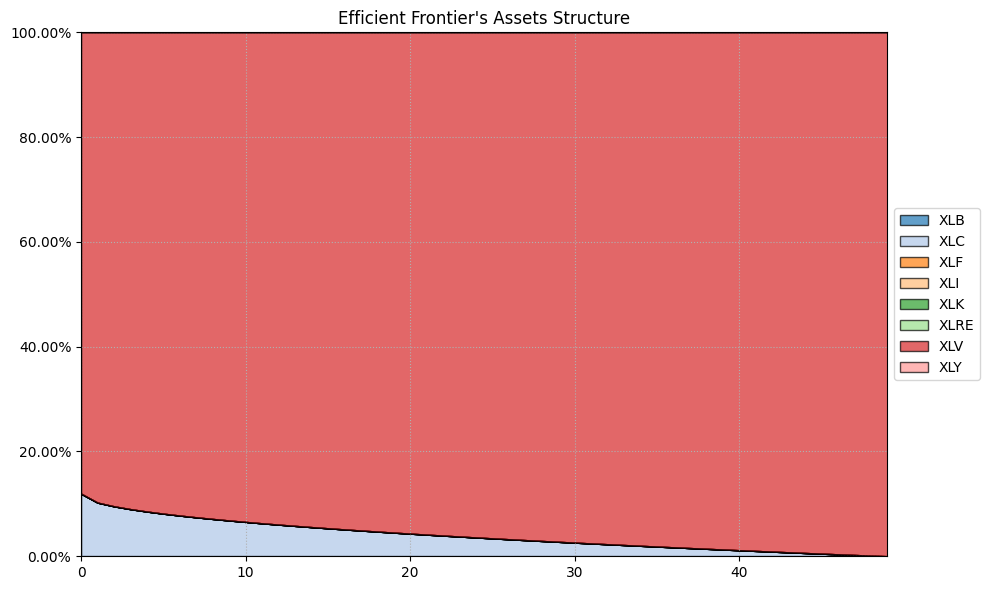

In [75]:
ax=rp.plot_frontier_area(w_frontier=frontier,cmap='tab20')
plt.show()

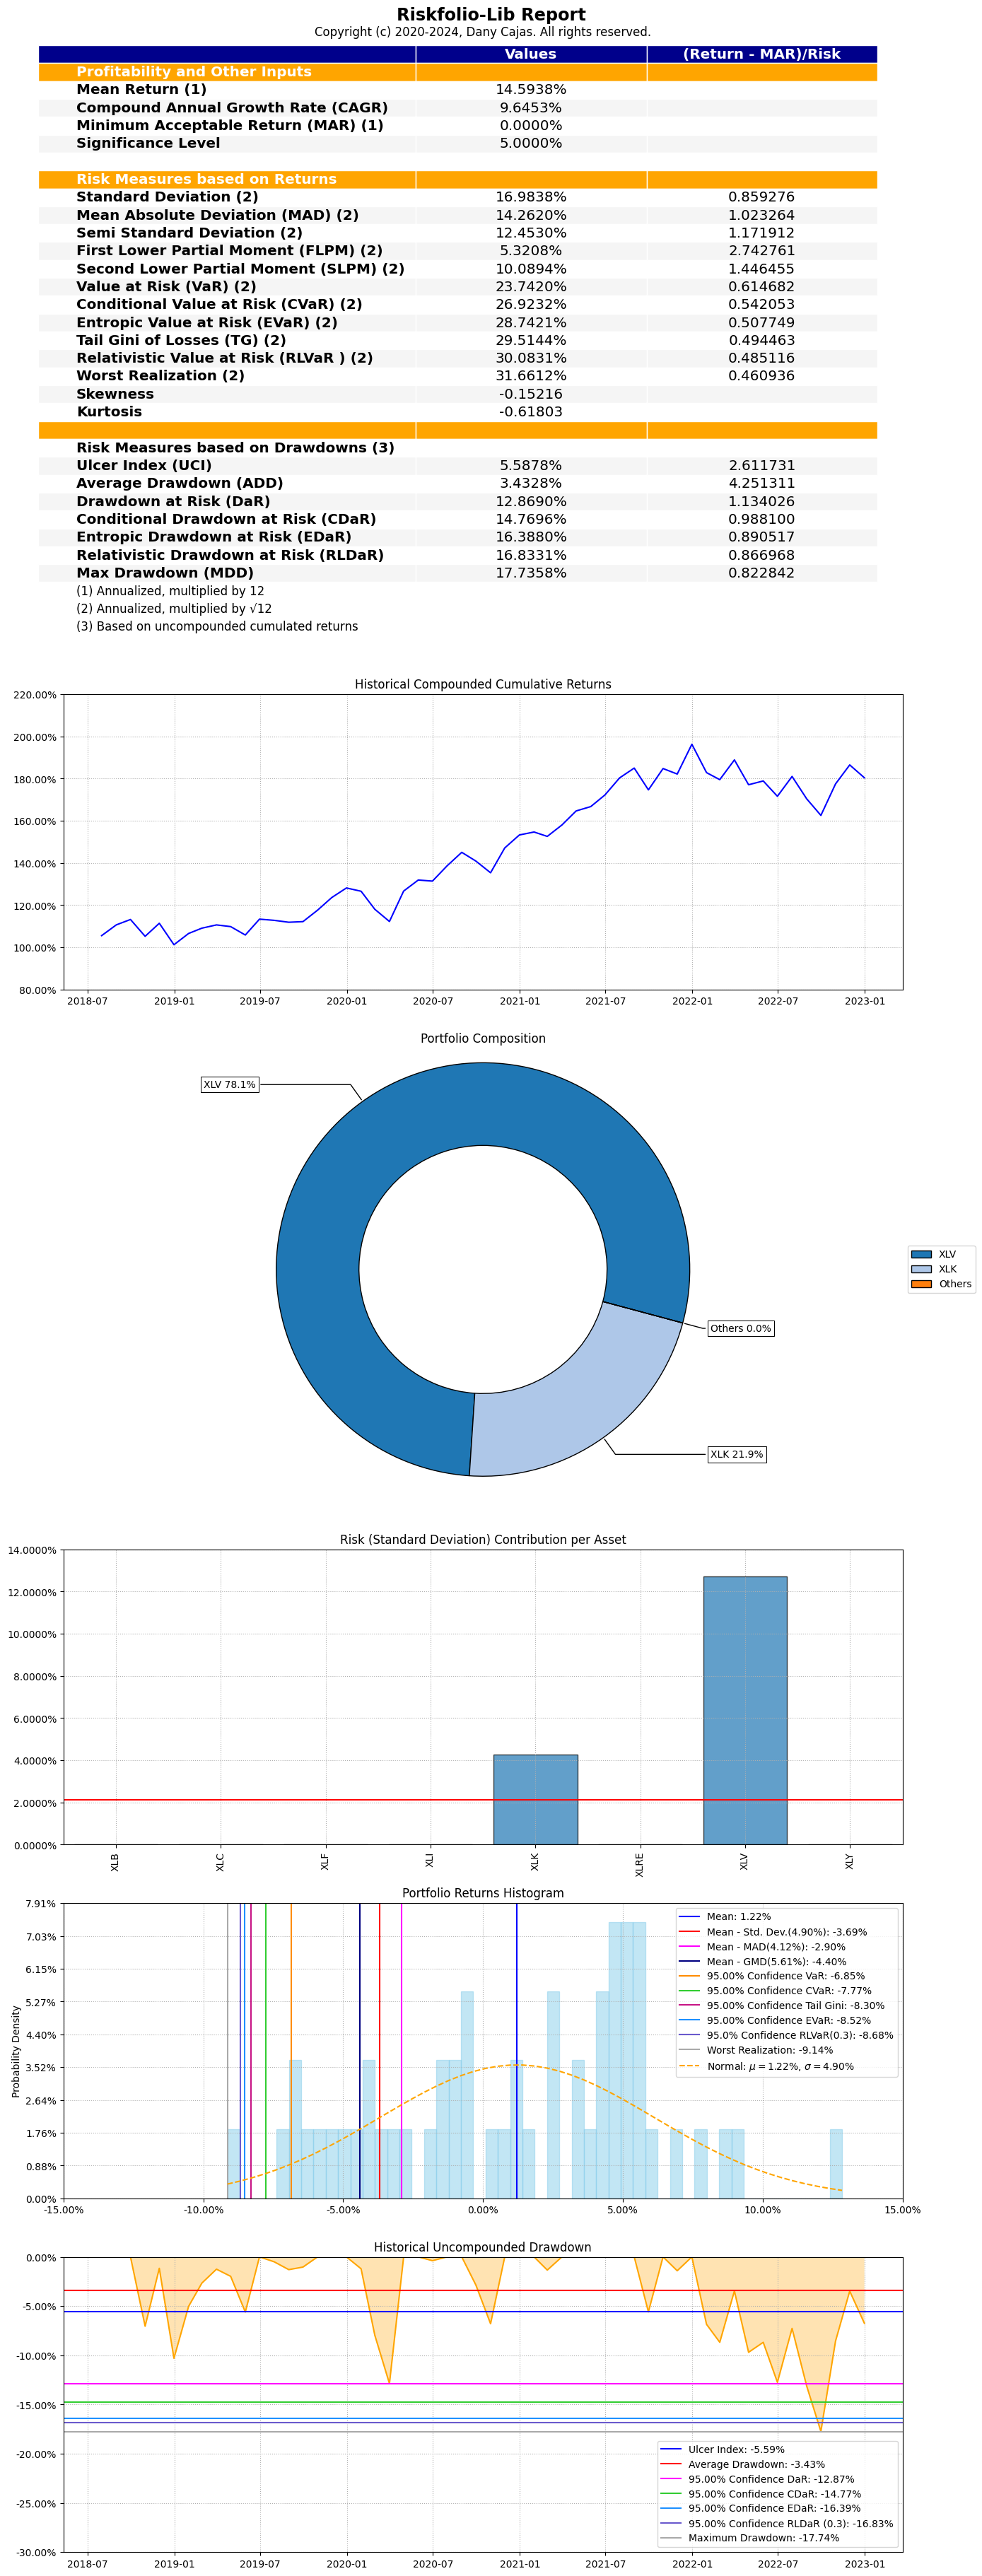

In [57]:
ax=rp.jupyter_report(Y,w,rm=rm,t_factor=12)
plt.show()